In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph



# Load list of branching instructions
In the form of instruction addresses 


In [2]:
import json 

test_name = "call"

input_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}")
output_assembly = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw.s")
output_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw")
test_values = os.path.abspath(f"../test_programs/{test_name}/test_inputs.txt")


# instrument each function seperately 
First instrument the code, then dump the rewritten program, then compile into new binary using gcc 

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


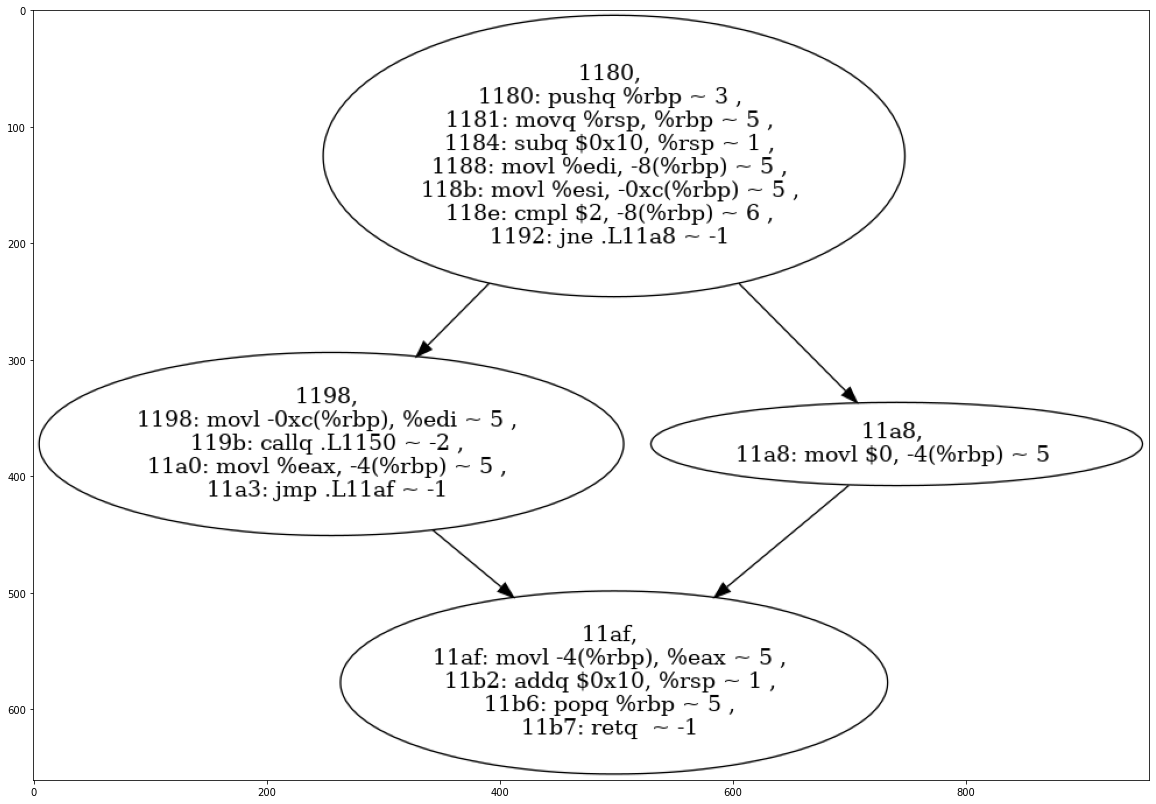

In [3]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)
figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['call'].render_cfg())


foo
main
call


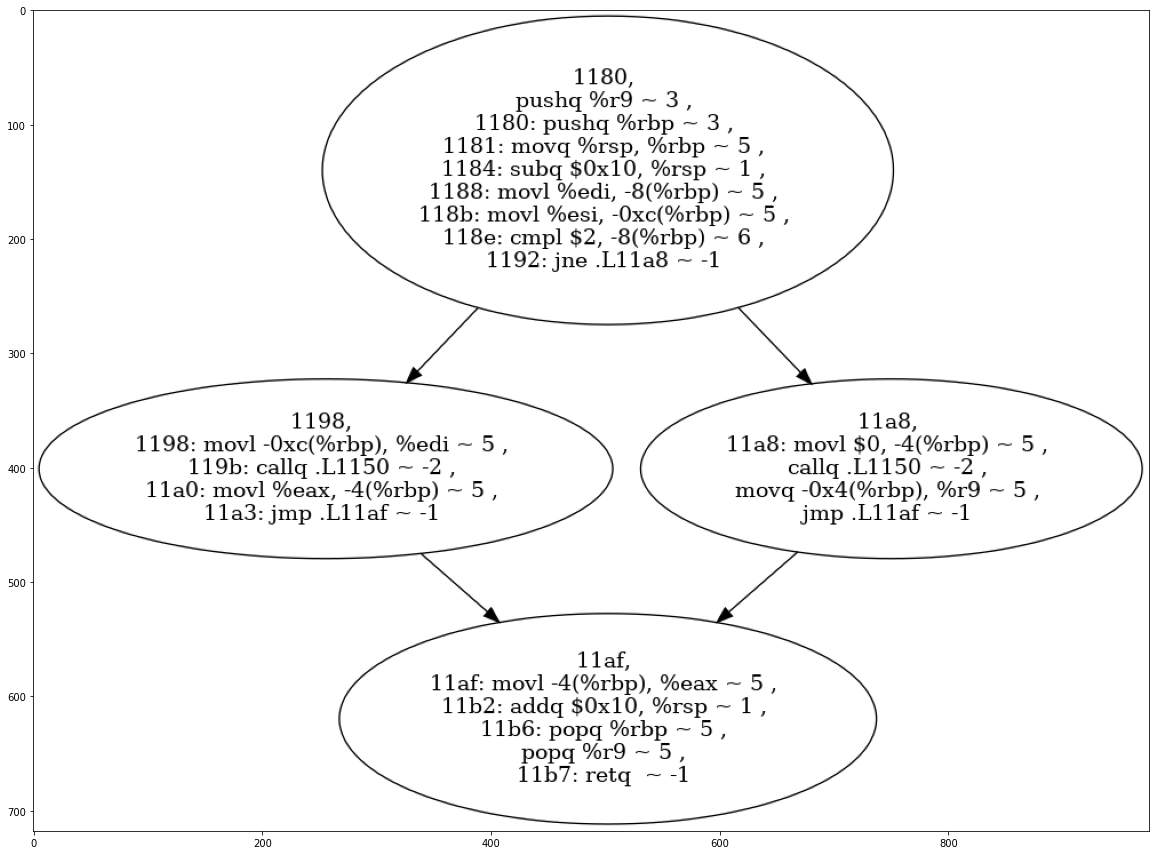

In [4]:

tool.instrument_program([1192])

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])
figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['call'].render_cfg())

# check if program is balanced 

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
foo
main
call


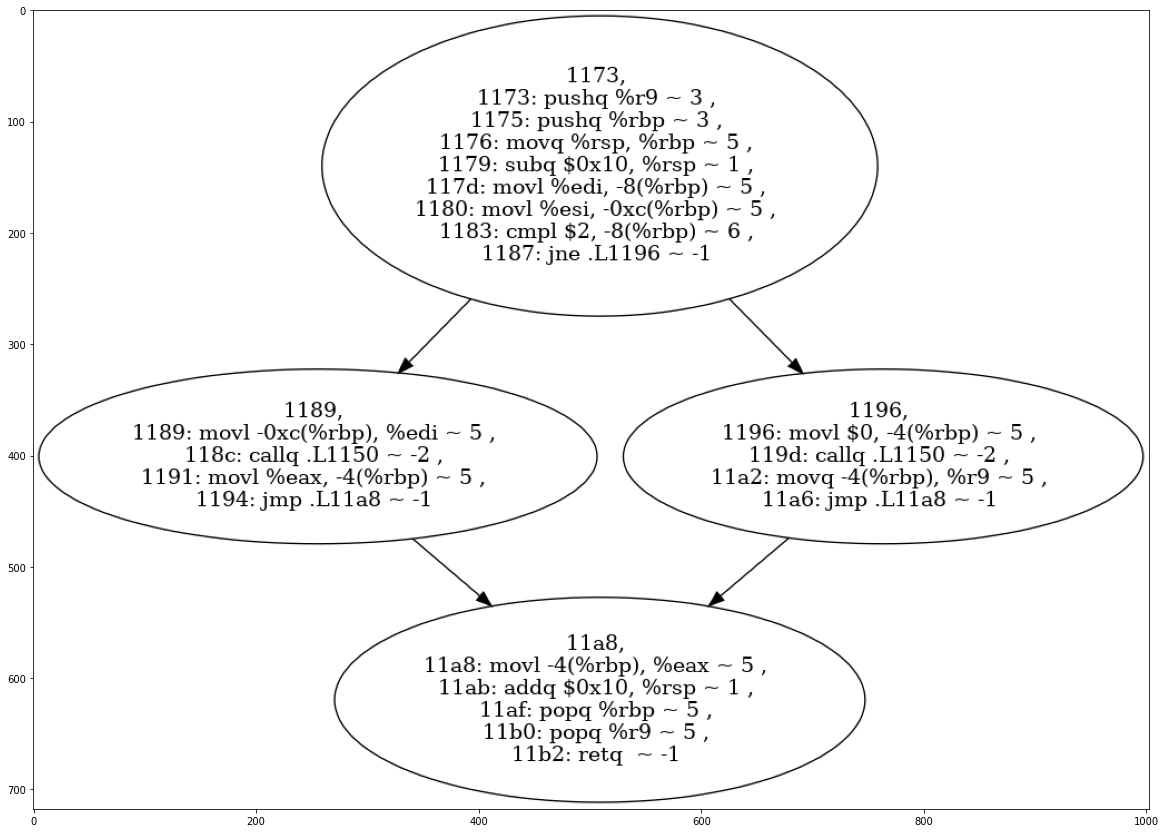

In [5]:
from rwtools.nemesis.evaluationtool import NemesisEvaluateProgram 
evaluation = NemesisEvaluateProgram(output_binary, "")

figs, axs = plt.subplots(1, figsize=(20,20))

evaluation.evaluate_program([1186])
axs.imshow(evaluation.functions['call'].render_cfg())


# check if program output / execution remains unchanged 


In [6]:

program_input = "2 10"
cmd = f"{output_binary} {program_input}"

subprocess.run([output_binary, "2", "10"])

test_cases = []

with open(test_values, "r") as f: 
    for line in f:
        test_cases.append(line.strip().split(" "))

for test_case in test_cases: 
    expected = subprocess.run([input_binary, *test_case]).returncode
    result = subprocess.run([output_binary, *test_case]).returncode
    if expected != result:
        print("incorrect result on test with inputs", *test_case)


# Evaluate effect on runtime 

In [7]:
import json 

test_name = "call"

input_binary = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}")
output_assembly = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}_rw.s")
output_binary = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}_rw")
test_values = os.path.abspath(f"./test_programs/{test_name}/test_inputs.txt")

with open(f"./test_programs/{test_name}/secrets.json", "r") as f: 
    d = json.load(f)

branching_instructions = d['branches']

branching_instructions

FileNotFoundError: [Errno 2] No such file or directory: './test_programs/call/secrets.json'

In [ ]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)

tool.instrument_program(branching_instructions)

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


In [ ]:
figs, axs = plt.subplots(1, figsize=(20, 20))
axs.imshow(tool.functions['call'].render_cfg())

In [ ]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

evaluate = NemesisEvaluateProgram(output_binary, output_assembly)

evaluate.evaluate_program(['1197'])

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


In [ ]:
figs, axs = plt.subplots(1, figsize=(20, 20))
axs.imshow(evaluate.functions['call'].render_cfg())

Run original program 1000 times, check avg number of elapsed cycles, do same for balanced program 

In [ ]:
a = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([input_binary, "2", "10"])
    a.append(result.returncode)

b = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([input_binary, "1", "10"])
    b.append(result.returncode)




In [ ]:
figs, axs = plt.subplots(2, figsize=(20, 20))
axs[0].hist(a, bins=40, range=[0, 250])
axs[1].hist(b, bins=40, range=[0, 250])



In [ ]:
c = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([output_binary, "2", "10"])
    c.append(result.returncode)

d = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([output_binary, "1", "10"])
    d.append(result.returncode)




In [ ]:
figs, axs = plt.subplots(2, figsize=(20, 20))
axs[0].hist(c, bins=40, range=[0, 250])
axs[1].hist(d, bins=40, range=[0, 250])



In [ ]:

len(a)
for x in [a, b, c, d]:
    print(float(sum(x)) / float(len(x)))
